In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Analysis on Product Sales

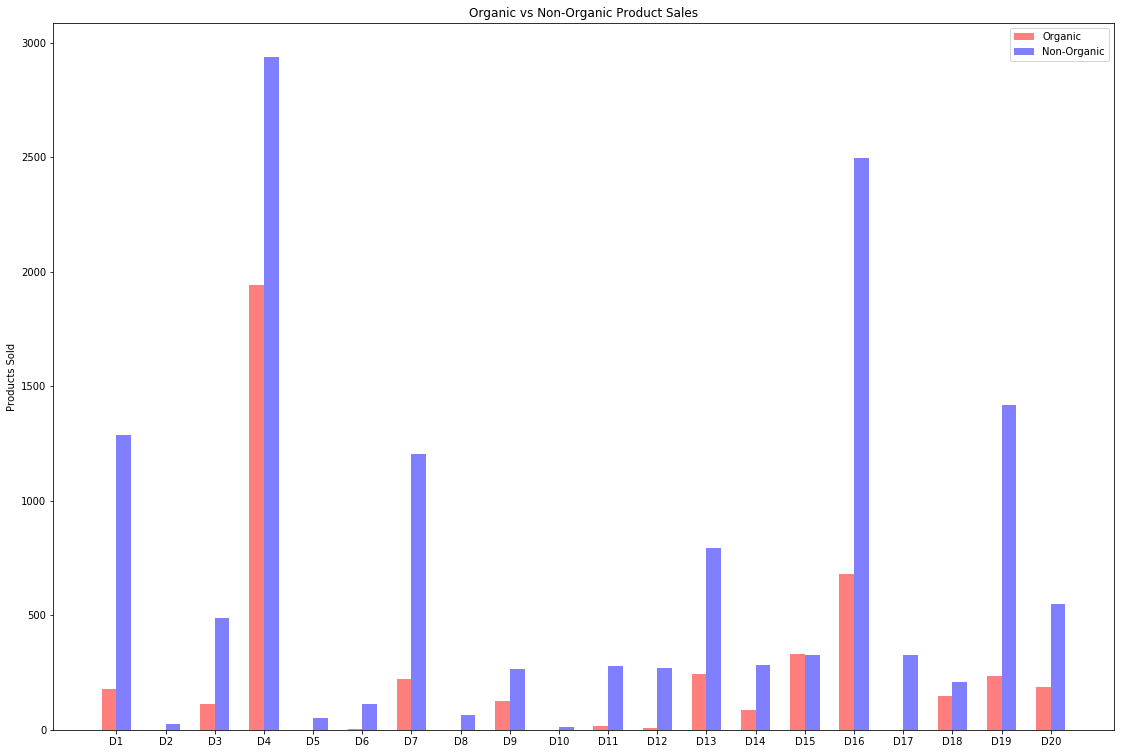

In [2]:
df = pd.read_csv('Data/10000_transactions.csv', engine="python")
df['product_name'] = df['product_name'].str.lower()

#ORGANIC COUNT PER DEPT
filteredOrg = df[df['product_name'].str.contains("organic")]

organicDeptTotal = []
for depts in range (1, 21):
    tempDept = filteredOrg[filteredOrg['department_id'] == depts]
    totalCount = len(tempDept)
    organicDeptTotal.append(totalCount)

#NON ORGANIC COUNT PER DEPT
ds1 = set([ tuple(line) for line in filteredOrg.values.tolist()])
ds2 = set([ tuple(line) for line in df.values.tolist()])
filteredNonOrg = pd.DataFrame(list(ds2.difference(ds1)))
filteredNonOrg.columns = filteredOrg.columns.tolist()

nonOrganicDeptTotal = []
for depts in range (1, 21):
    tempDept = filteredNonOrg[filteredNonOrg['department_id'] == depts]
    totalCount = len(tempDept)
    nonOrganicDeptTotal.append(totalCount)

#bar graph

chikkin = 20
width = 0.3
ind = np.arange(chikkin)

fig, ax = plt.subplots(1, 1, figsize=(19,13))

chikkin1 = ax.bar(ind, organicDeptTotal, align = 'center', color = 'r', alpha = 0.5, width = 0.3)
chikkin2 = ax.bar(ind+width, nonOrganicDeptTotal, align = 'center', color = 'b', alpha = 0.5, width = 0.3)

#labels

ax.set_ylabel('# of Products Sold')
ax.set_title('Organic vs Non-Organic Product Sales')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('D1', 'D2', 'D3', 'D4', 'D5', 'D6','D7','D8', 'D9',
                    'D10', 'D11','D12', 'D13', 'D14', 'D15', 'D16','D17','D18', 'D19', 'D20'))

ax.legend((chikkin1[0], chikkin2[0]), ('Organic', 'Non-Organic'))

plt.show()

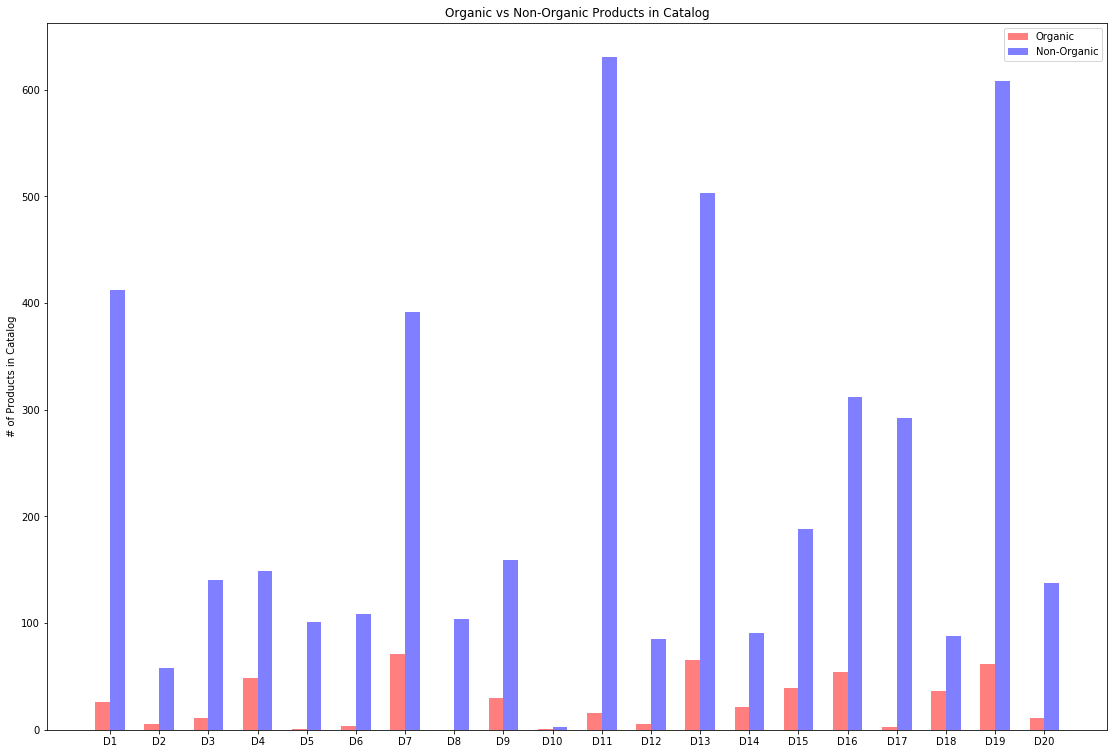

In [33]:
df = pd.read_csv('Data/catalog.csv', engine="python")

df['prod_name'] = df['prod_name'].str.lower()

#ORGANIC COUNT PER DEPT
filteredOrg = df[df['prod_name'].str.contains("organic")]

organicDeptTotal = []
for depts in range (1, 21):
    tempDept = filteredOrg[filteredOrg['department_id'] == depts]
    totalCount = len(tempDept)
    organicDeptTotal.append(totalCount)

#NON ORGANIC COUNT PER DEPT
ds1 = set([ tuple(line) for line in filteredOrg.values.tolist()])
ds2 = set([ tuple(line) for line in df.values.tolist()])
filteredNonOrg = pd.DataFrame(list(ds2.difference(ds1)))
filteredNonOrg.columns = filteredOrg.columns.tolist()

nonOrganicDeptTotal = []
for depts in range (1, 21):
    tempDept = filteredNonOrg[filteredNonOrg['department_id'] == depts]
    totalCount = len(tempDept)
    nonOrganicDeptTotal.append(totalCount)

#bar graph

chikkin = 20
width = 0.3
ind = np.arange(chikkin)

fig, ax = plt.subplots(1, 1, figsize=(19,13))

chikkin1 = ax.bar(ind, organicDeptTotal, align = 'center', color = 'r', alpha = 0.5, width = 0.3)
chikkin2 = ax.bar(ind+width, nonOrganicDeptTotal, align = 'center', color = 'b', alpha = 0.5, width = 0.3)

#labels

ax.set_ylabel('# of Products in Catalog')
ax.set_title('Organic vs Non-Organic Products in Catalog')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('D1', 'D2', 'D3', 'D4', 'D5', 'D6','D7','D8', 'D9',
                    'D10', 'D11','D12', 'D13', 'D14', 'D15', 'D16','D17','D18', 'D19', 'D20'))

ax.legend((chikkin1[0], chikkin2[0]), ('Organic', 'Non-Organic'))

plt.show()

# Department Association

Based on the data below, we think the following are the category names for each of the departments. 

- Department 1: Frozen Food
- Department 2: Health / Pharmacy
- Department 3: Bread
- Department 4: Fresh Produce
- Department 5: Liquor
- Department 6: Ethnic Foods
- Department 7: Drinks
- Department 8: Pets
- Department 9: Pasta
- Department 10: ?????
- Department 11: Personal Care
- Department 12: Meat
- Department 13: Sauces
- Department 14: Breakfast
- Department 15: Canned Food
- Department 16: Diary
- Department 17: Cleaning
- Department 18: Baby
- Department 19: Sweets
- Department 20: Deli



In [39]:
df = pd.read_csv('Data/catalog.csv', engine="python")

for i in range(1, 21):
    filtered = df[df['department_id'] == i]
    #Dep 1
    commonWords = Counter(" ".join(filtered['prod_name']).split()).most_common(13)
    actual = []
    stopWords = ["&", "Organic", "Food", "Free", "Natural", "in", "with"]
    for item in commonWords:
        if (item[0] not in stopWords):
            actual.append(item[0])
    actualStr = ', '.join(actual)
    print("DEPT %i: %s" % (i, actualStr))


DEPT 1: Cream, Ice, Chicken, Cheese, Frozen, Pizza, Chocolate, Vanilla, Crust, Bars, Sausage
DEPT 2: Lubricant, Condoms, Flavor, Original, White, Ultra, Premium, Thin, Grape, Cleanse
DEPT 3: Bread, Whole, Wheat, Grain, Muffins, Tortillas, Chocolate, English, Buns, Gluten, Rolls
DEPT 4: Salad, Red, Sweet, Baby, Sprouts, Tomatoes, Kale, Lettuce, Apples, Fresh, Squash, Pepper
DEPT 5: Ale, Sauvignon, Beer, Wine, Cabernet, Lager, IPA, Valley, Chardonnay, Whiskey, California, Scotch, Original
DEPT 6: Sauce, Mix, Noodles, Rice, Mild, Red, Enchilada, Seaweed, Style, Miso, Medium
DEPT 7: Tea, Juice, Water, Drink, Coffee, Sparkling, Orange, Blend, Fruit, Bags, 100%
DEPT 8: Cat, Dog, Chicken, Treats, Gravy, Litter, Salmon, Flavor, Turkey, Wet
DEPT 9: Pasta, Rice, Sauce, Cheese, Grain, Macaroni, Garlic, White, Spaghetti, Cheddar, Whole
DEPT 10: Brown, Ginger, Apricots, Beans, Basmati, Cranberry, Chunks, Rice, Crystallized
DEPT 11: Body, Soap, Hand, Wash, Liquid, Shampoo, Tablets, Oil, Vitamin, Gel